# Bag of words

In this notebook, we will show some interesting AI tools used on text.

**Global setup**

In [1]:
try:
    with open("../global_setup.py") as setupfile:
        exec(setupfile.read())
except FileNotFoundError:
    print('Setup already completed')

**Local setup**

In [2]:
from pathlib import Path
import json

from IPython.display import display

from notebooks.exercises.src.text.bag_of_words import BagOfWords
from notebooks.exercises.src.text.sentiment_viewing import ViewSentiment
from notebooks.exercises.src.text.wiki_search_dash import WikipediaSearchDashboard
from notebooks.exercises.src.text.twittipedia import Twittipedia
from src.text.document_retrieval.wikipedia import Wikipedia
from src.text.twitter.twitter_client import TwitterClient
from src.text.twitter.twitter_analyze import TwitterSentimentViewer
from src.utility.files import ensure_directory

authentication_path = Path("data", "twitter", "authentication.json")
ensure_directory(authentication_path)

In [3]:
%matplotlib notebook

In [4]:
%%html
<style>
    .output_wrapper button.btn.btn-default,
    .output_wrapper .ui-dialog-titlebar {
        display: none;
    }
</style>

## Prerequisites

We need to download and process Wikipedia (only the abstracts) and set up access to Twitter.

### Wikipedia

Since downloading and processing Wikipedia takes some time we'll start it off now and then return to it later. It should take about `EXPECTED_TIME` to finish.

In [5]:
wikipedia = Wikipedia(
    language="English",
    cache_directory_url="https://people.compute.dtu.dk/chegr/data-sets/",
    # maximum_number_of_documents=100
)

Failed to download documents (HTTP Error 404: Not Found).
Falling back to parsing Wikipedia locally.


KeyboardInterrupt: 

### Twitter

1. Create an account on Twitter (if you don't have any or want one specifically for this course).
    * Go to [Twitter](https://twitter.com).
	* You are only have to use this account to *download* tweets.  
   
2. Create a new app in Twitter Application Management.
    * Go to [Twitter's Application Management page](https://apps.twitter.com/).
    * Fill out the details:
        * Name: Make up a good name for your application.
        * Description: "Application to pull tweets from Twitter for use in DTU CogSys's AI Playground".
        * Website: <https://github.com/DTUComputeCognitiveSystems/AI_playground>
	* Read and agree to [Twitter's developer agreement and policy](https://dev.twitter.com/overview/terms/agreement-and-policy).
    
3. Copy the consumer key and secret and paste below.
	* In the "Keys and Access Tokens" tab under "Application Settings".

In [6]:
# For easier development, the consumer key and secret can be read from a file
use_file = True
consumer_key = ""
consumer_secret = ""

if use_file:
    twitter = TwitterClient.authenticate_from_path()
    
else:
    twitter = TwitterClient(consumer_key, consumer_secret)
    twitter.save_authentication_to_path()

ValueError: No authentication found at: data\twitter\authentication.json

## Introduction

We need a simple representation of text…

A bag-of-words representation is a way to represent documents by counting distinct words in each document. First, the distinct words for a set of documents (also called a corpus) is found. This is called the vocabulary. Then for each document the number of occurences of each distinct word is counted.

### Example

To show how this is done, we first need a corpus. We start with a fictional corpus of tweets.

A new Twitter user with limited vocabulary might tweet something like the following:

In [7]:
fictional_tweets = [
    "This is my first tweet!",
    "My second tweet is not like my first tweet.",
    "I really like to tweet in my own words. This is fun.",
    "I am running out of things to tweet.",
    "I do not really like to tweet anymore."
]

We can find the distinct words making up the vocabulary:

In [8]:
fictional_vocabulary = {
    word.strip(".!").lower()
    for tweet in fictional_tweets for word in tweet.split()
}
display(fictional_vocabulary)

{'am',
 'anymore',
 'do',
 'first',
 'fun',
 'i',
 'in',
 'is',
 'like',
 'my',
 'not',
 'of',
 'out',
 'own',
 'really',
 'running',
 'second',
 'things',
 'this',
 'to',
 'tweet',
 'words'}

We start by focusing on the first tweet.

<IPython.core.display.Javascript object>


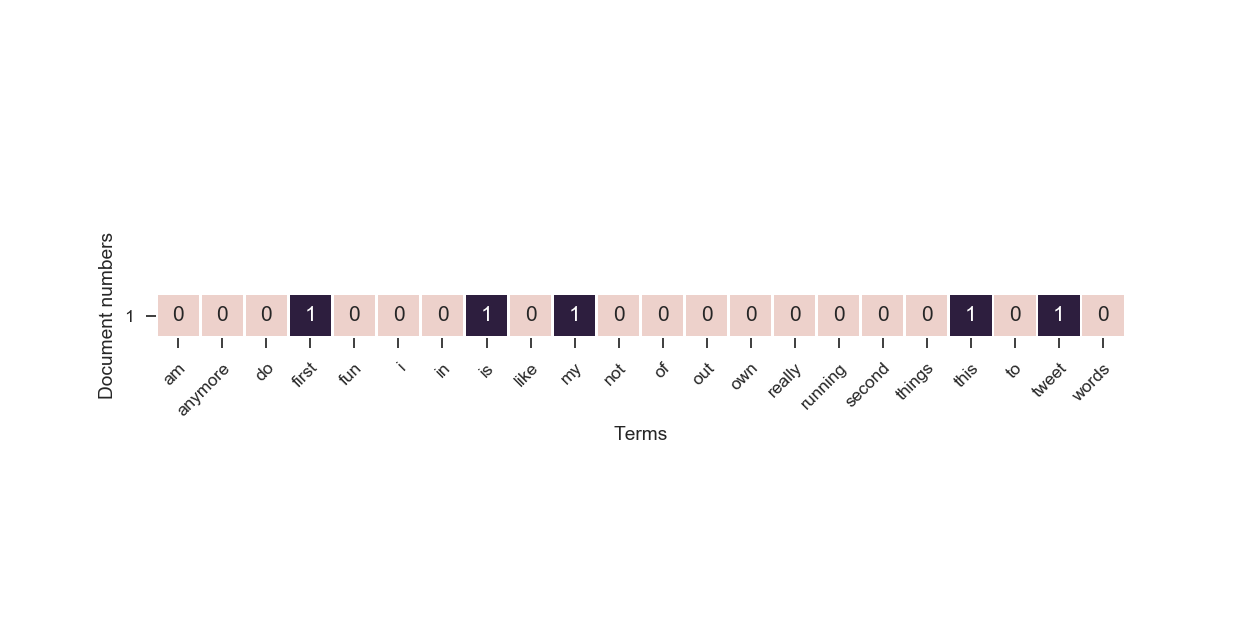

In [9]:
one_tweet_bag_of_words = BagOfWords(
    corpus=fictional_tweets[0],
    vocabulary=fictional_vocabulary
)
one_tweet_bag_of_words.plot_heat_map()

Including the second tweet.

<IPython.core.display.Javascript object>


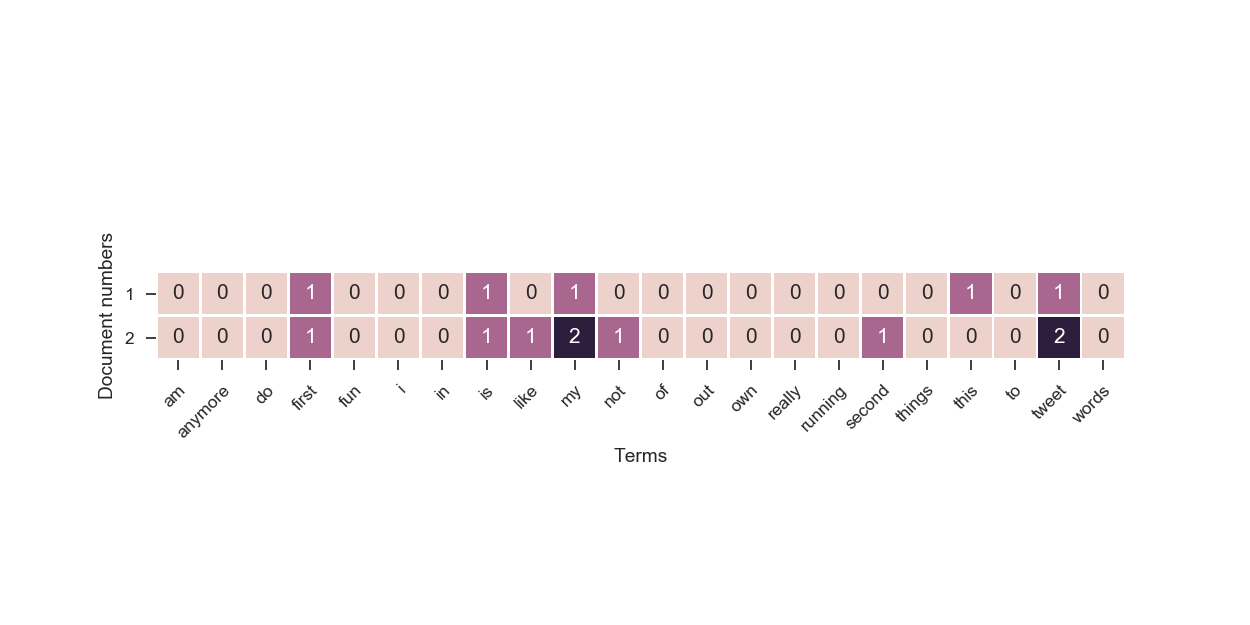

In [10]:
two_tweet_bag_of_words = BagOfWords(
    corpus=fictional_tweets[0:2],
    vocabulary=fictional_vocabulary
)
two_tweet_bag_of_words.plot_heat_map()

All tweets:

<IPython.core.display.Javascript object>


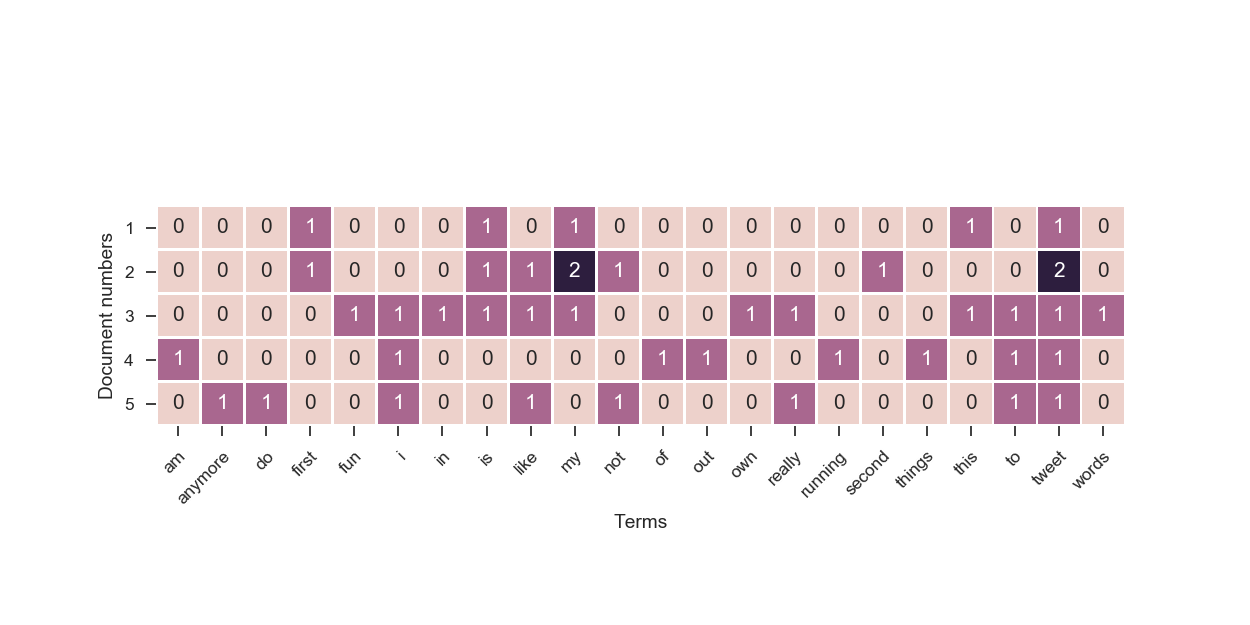

In [11]:
fictional_bag_of_words = BagOfWords(
    corpus=fictional_tweets,
    vocabulary=fictional_vocabulary
)
fictional_bag_of_words.plot_heat_map()

#### Word cloud



In [ ]:
fictional_bag_of_words.plot_word_cloud()

#### tf-idf



<IPython.core.display.Javascript object>


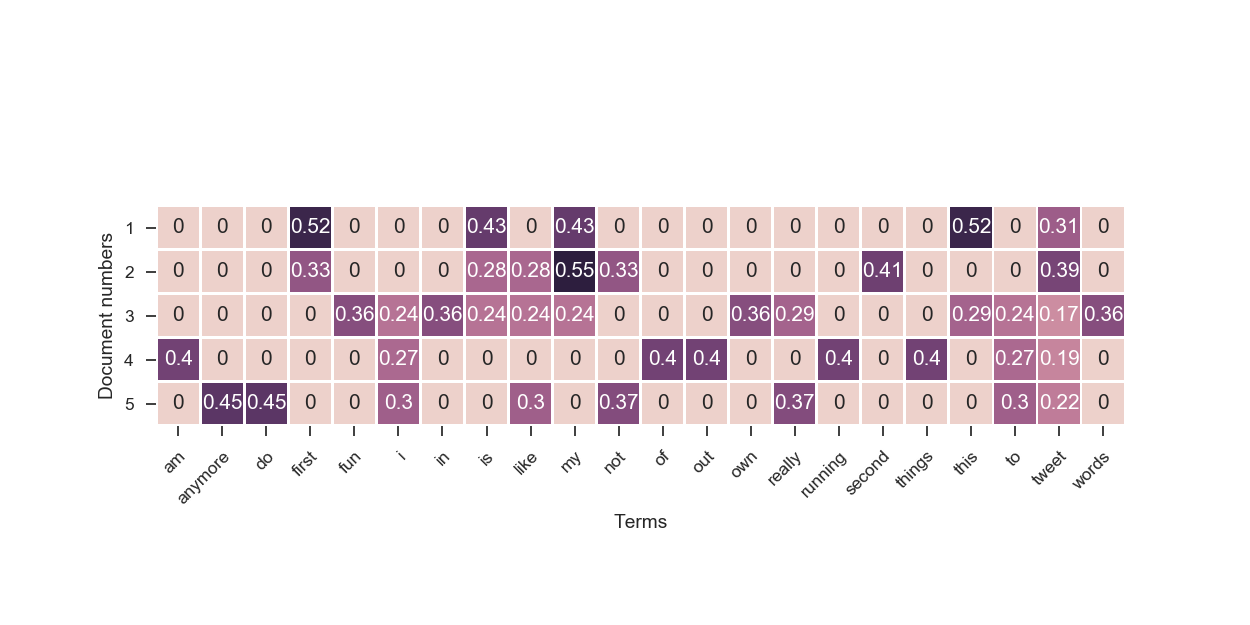

In [12]:
fictional_bag_of_words.plot_heat_map(kind="tfidf")

<IPython.core.display.Javascript object>


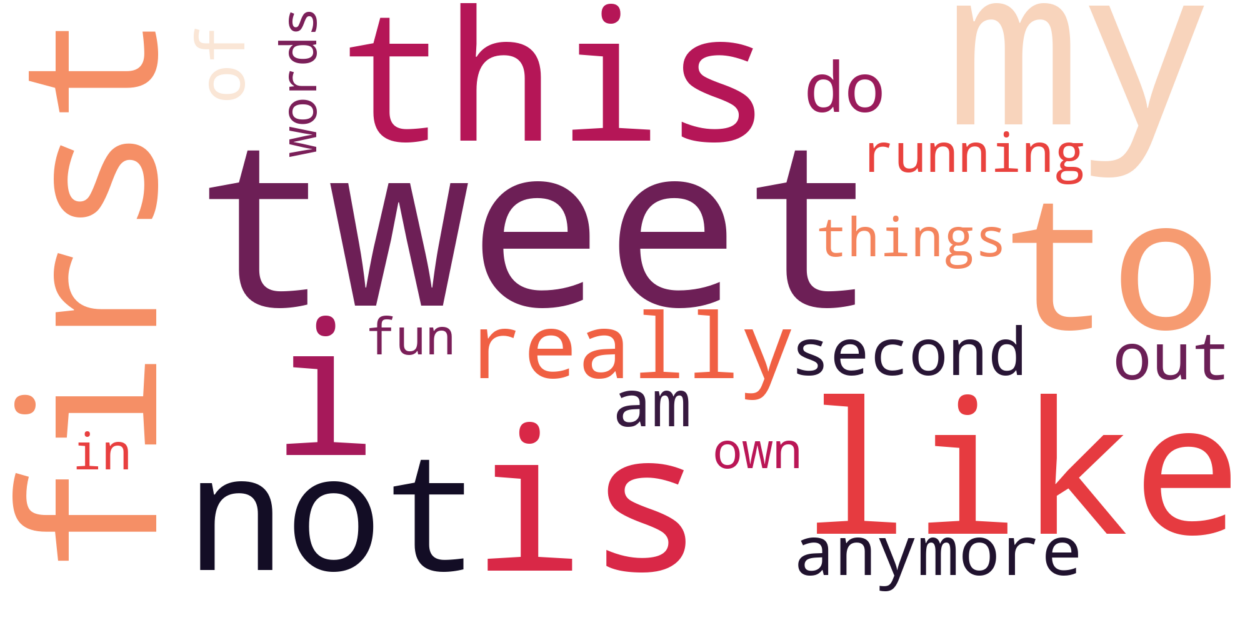

In [13]:
fictional_bag_of_words.plot_word_cloud(kind="tfidf")

### Questions

1. Why not use a set of real tweets instead of the fictional tweets?
    * Little overlap between document vocabulary for small sets.
2. Try to replacing the fictional tweets.

## Real tweets

We fetch some tweets:

In [ ]:
tweets = twitter.search("summer", language="English", count=10)

Then, we extract the text from each tweet:

In [ ]:
tweet_texts = [
    tweet.text_excluding(
        hashtags=False,
        mentions=True,
        urls=True
    )
    for tweet in tweets
]

Vocabulary from Wikipedia:

In [ ]:
wikipedia_vocabulary = wikipedia.vocabulary
display(wikipedia_vocabulary)

Both bag-of-words matrix and tf-idf transformed one.

In [ ]:
bag_of_words = BagOfWords(
    corpus=tweet_texts,
    vocabulary=wikipedia_vocabulary
)
bag_of_words.plot_heat_map()

In [ ]:
bag_of_words.plot_word_cloud()

In [ ]:
bag_of_words.plot_pca()

In [ ]:
bag_of_words.plot_heat_map(kind="tfidf")

In [ ]:
bag_of_words.plot_word_cloud(kind="tfidf")

In [ ]:
bag_of_words.plot_pca(kind="tfidf")

## Sentiment analysis

In [ ]:
viewer = TwitterSentimentViewer(twitter_client=twitter)

In the below cells you can write text and have its words highlighted according to their sentiment.

In [ ]:
viewer = ViewSentiment()

## Wikipedia Search

In [ ]:
dashboard = WikipediaSearchDashboard(wikipedia=wikipedia)

In [ ]:
twittipedia = Twittipedia(twitter_client=twitter, wikipedia=wikipedia)

## Clean up

In [ ]:
twitter.clear_cache()